# Use k-means clustering for image segmentation and to identify dominant color in the image.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.colors import ListedColormap
import scipy
%matplotlib inline
from sklearn.cluster import KMeans

# Load Data

# 1.Open and display the image “dog.jpeg”. 

JPEG
RGB
(272, 185)


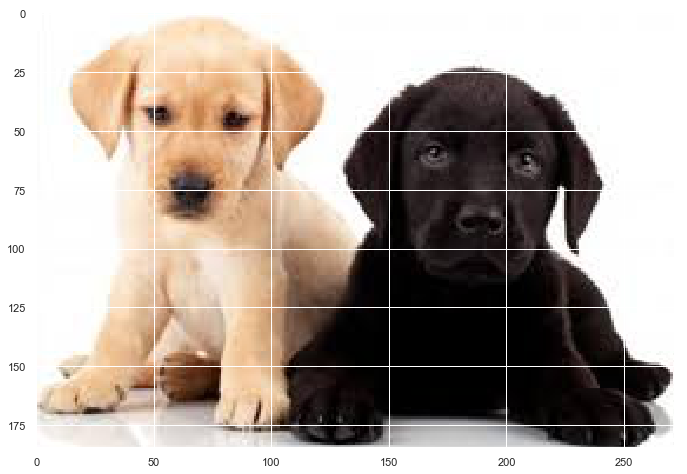

In [71]:
from PIL import Image, ImageFilter
#Read image
img = Image.open('C:/edureka/dogs.jpeg')
#Display image
plt.figure(figsize = (15,8))
plt.imshow(img)
print(img.format)
print(img.mode)
print(img.size)

# Convert the image in to numpy array, so that i can be used in further processing.

In [75]:
width,height=img.size
width,height

(272, 185)

In [76]:
arr = np.array(img)

In [77]:
arr

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 248, 249],
        [254, 250, 251],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 246],
        [250, 248, 249],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[253, 251, 254],
        [253, 251, 254],
        [253, 251, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [78]:
arr.shape

(185, 272, 3)

# 2.Find out the dimensions of the image and convert it in to a two-dimensional array.

In [80]:
x, y, z=arr.shape
x, y, z

(185, 272, 3)

In [81]:
new_2d=np.reshape(arr,(185*272,3))

In [82]:
new_2d.shape

(50320, 3)

# 3.Use kmeans clustering with k set to 3 and cluster the image.

In [83]:
from sklearn import cluster

In [84]:
kmeans_cluster = cluster.KMeans(n_clusters=3)

kmeans_cluster.fit(new_2d)

cluster_centers = kmeans_cluster.cluster_centers_

cluster_labels = kmeans_cluster.labels_


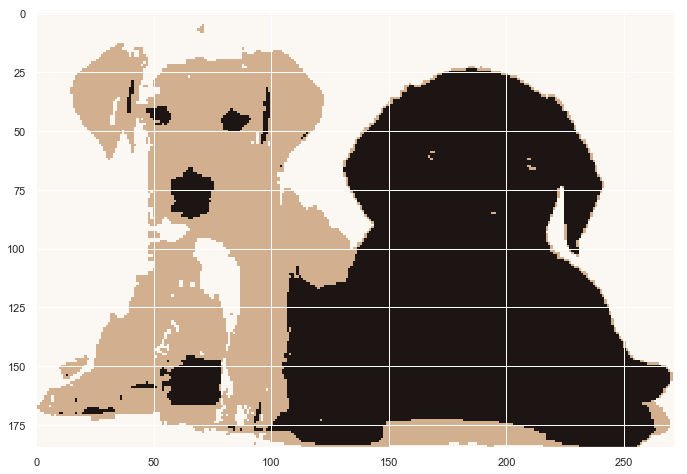

In [85]:
plt.figure(figsize = (15,8))
newimg=cluster_centers[cluster_labels].reshape(x, y, z)
plt.imshow(newimg/255)
#plt.figure(figsize = (15,8))
#newimg=cluster_centers[cluster_labels].reshape(x, y, z)
#plt.imshow(np.array(newimg,np.int32))


# 4.Predict the cluster label of every pixel in the image and plot it back as an image.

uint8
(185, 272, 3)


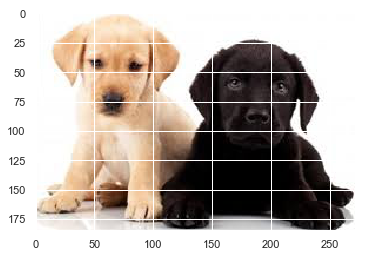

In [3]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
df = image.imread('C:/edureka/dogs.jpeg')
print(df.dtype)
print(df.shape)
# display the array of pixels as an image
pyplot.imshow(df)
pyplot.show()

In [4]:
img2d=np.reshape(df,(185*272,3))

In [5]:
from sklearn import cluster
kmeans_cluster = cluster.KMeans(n_clusters=3)

kmeans_cluster.fit(img2d)

cluster_centers = kmeans_cluster.cluster_centers_

cluster_labels = kmeans_cluster.labels_


In [6]:
labels=kmeans_cluster.predict(img2d)

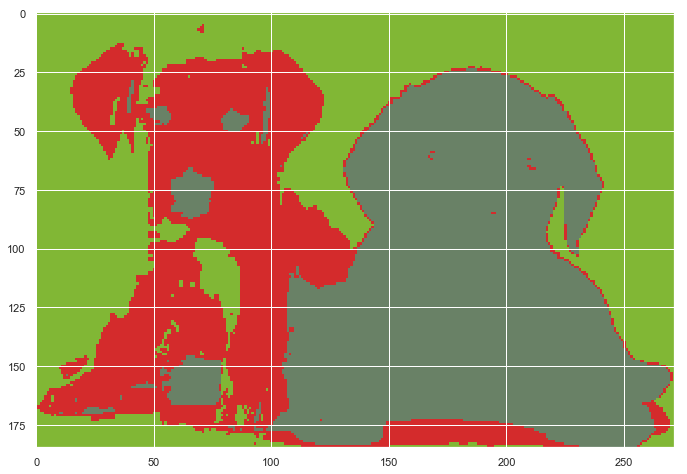

In [7]:
plt.figure(figsize = (15,8))
newimg=cluster_centers[labels].reshape(185, 272, 3)
plt.imshow((newimg * 255).astype(np.uint8))

# 5.Find out the three dominant color in the image.

# Ploting 3D Dominant Colors

In [111]:
r = []
g = []
b = []
for x in range(0, width):
    for y in range(0, height):
        temp_r, temp_g, temp_b = img.getpixel((x,y))
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

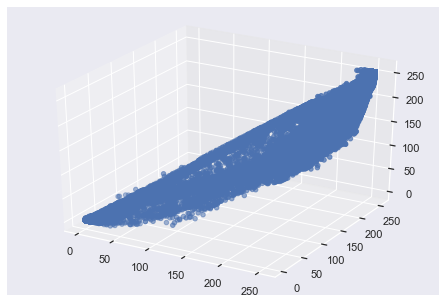

In [112]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

# Perform Clustering 

In [113]:
df = pd.DataFrame({'red': r,'blue': b,'green': g})

In [114]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
29398,4,4,4,0.038685,0.040127,0.039302
17504,226,148,187,2.185723,1.484705,1.837392
24279,254,254,254,2.456521,2.548075,2.495708
40178,250,248,250,2.417835,2.487884,2.456406
33524,55,45,43,0.531924,0.451431,0.422502
4134,255,255,255,2.466192,2.558107,2.505534
130,253,253,253,2.446849,2.538043,2.485883
43638,13,7,7,0.125727,0.070223,0.068779
27195,254,254,254,2.456521,2.548075,2.495708
27756,254,254,254,2.456521,2.548075,2.495708


In [116]:
from scipy.cluster.vq import kmeans
cluster_centers,distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

# Display Dominant Colors

In [117]:
print(cluster_centers)

[[0.33245664 0.24911633 0.23468063]
 [2.30642102 2.19054609 2.09111634]]
